In [235]:
import pandas as pd
import numpy as np
import missingno as mo

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rule
from sklearn.linear_model import LogisticRegression as Logit

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

#plotting
from plotnine import *
import matplotlib.pyplot as plt

# permutation
from sklearn.inspection import permutation_importance

In [236]:
jordan = pd.read_csv("arabbaro/arabbaro_jo_labeled_reduced.csv")

In [237]:
jordan.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"],inplace = True)

In [238]:
kuwait = pd.read_csv("arabbaro/arabbaro_kuw_labeled_reduced.csv")

In [239]:
kuwait.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [240]:
egypt = pd.read_csv("arabbaro/arabbaro_egy_labeled_reduced.csv")

In [241]:
egypt.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [242]:
morocco = pd.read_csv("arabbaro/arabbaro_mor_labeled_reduced.csv")

In [243]:
morocco.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"], inplace = True)

In [244]:
algeria = pd.read_csv("arabbaro/arabbaro_alg_labeled_reduced.csv")

In [245]:
algeria.drop(columns = ["y_dem_top_issue", "y_dem_pref", "y_trust_army", "y_trust_pres_prime", "y_trust_ikhwan", "Unnamed: 0"],inplace = True)

In [246]:
def dempref(df):
    # set up SKLearn Framework
    y = df.y_2_dem_pref_not_in_dem
    X = df.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_trust_gov"])

    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

    # Set the folds index to ensure comparable samples
    fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

    # Build the modeling pipeline
    pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

    search_space = [
    
        # NaiveBayes
        {'model': [NB()]},
    
        # KNN with K tuning param
        {'model' : [KNN()],
        'model__n_neighbors':[5,10,25,50]},
    
        # Decision Tree with the Max Depth Param
        {'model': [DT()],
        'model__max_depth':[2,3,4]},
    
        # Random forest with the N Estimators, max depth, and max features tuning param
        {'model' : [RF()],
        'model__max_depth':[6,7,8],
        'model__n_estimators':[500,1000,1500],
        'model__max_features': [5,10,15]},
        
        # logit model
        {'model': [Logit()],
        'model__class_weight':[None, "balanced"]},
    
    ]

    # Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
    search = GridSearchCV(pipe, search_space, 
                         cv = fold_generator,
                         scoring='roc_auc',
                         n_jobs=4)

    # fit the data with the model
    search.fit(train_X,train_y)
    
    best_mod = search.best_estimator_

    return(search.best_score_, search.best_estimator_, search.predict(test_X), m.plot_confusion_matrix(best_mod, test_X, test_y), train_X, test_X, train_y, test_y)

In [247]:
def trustgov(df):
    # set up SKLearn Framework
    y = df.y_1_trust_gov
    X = df.drop(columns = ["y_2_dem_pref_not_in_dem", "y_1_trust_gov"])
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

    # Set the folds index to ensure comparable samples
    fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

    # Build the modeling pipeline
    pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

    search_space = [
    
        # NaiveBayes
        {'model': [NB()]},
    
        # KNN with K tuning param
        {'model' : [KNN()],
        'model__n_neighbors':[5,10,25,50]},
    
        # Decision Tree with the Max Depth Param
        {'model': [DT()],
        'model__max_depth':[2,3,4]},
    
        # Random forest with the N Estimators, max depth, and max features tuning param
        {'model' : [RF()],
        'model__max_depth':[6,7,8],
        'model__n_estimators':[500,1000,1500],
        'model__max_features': [5,10,15]},
        
        # logit model
        {'model': [Logit()],
        'model__class_weight':[None, "balanced"]},
    
    ]

    # Grid Search to find the best parameters. The metric used for evaluation is ROC AUC
    search = GridSearchCV(pipe, search_space, 
                         cv = fold_generator,
                         scoring='roc_auc',
                         n_jobs=4)

    # fit the data with the model
    search.fit(train_X,train_y)
    
    best_mod = search.best_estimator_

    return(search.best_score_, search.best_estimator_, search.predict(test_X), m.plot_confusion_matrix(best_mod, test_X, test_y), train_X, test_X, train_y, test_y)

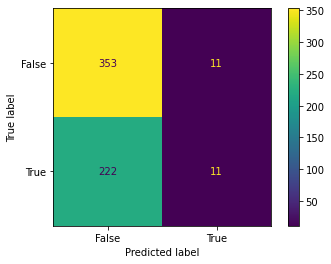

In [248]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(jordan)

In [249]:
score

0.5574619544615292

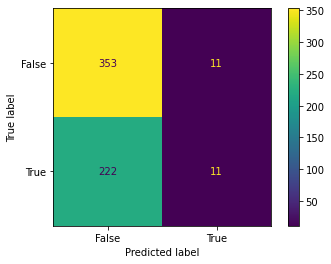

In [250]:
confusion.figure_

In [251]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=10,
                                        n_estimators=1000))])

In [252]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [253]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,age,0.025014,0.003677,0.017661,0.032367
1,internet_use_ordinal_4_is_top,0.012842,0.001579,0.009683,0.016000
2,internet_use_bin,0.012619,0.001481,0.009656,0.015582
3,educ,0.011390,0.001481,0.008427,0.014353
4,male,0.010720,0.001192,0.008336,0.013105
5,retired,0.005472,0.000418,0.004636,0.006307
6,neighb_rich,0.005248,0.001821,0.001606,0.008891
7,orgmem,0.005248,0.001349,0.002550,0.007947
8,infs_socmed,0.004690,0.001523,0.001644,0.007736
9,employed_priv_sec,0.004578,0.001083,0.002413,0.006744


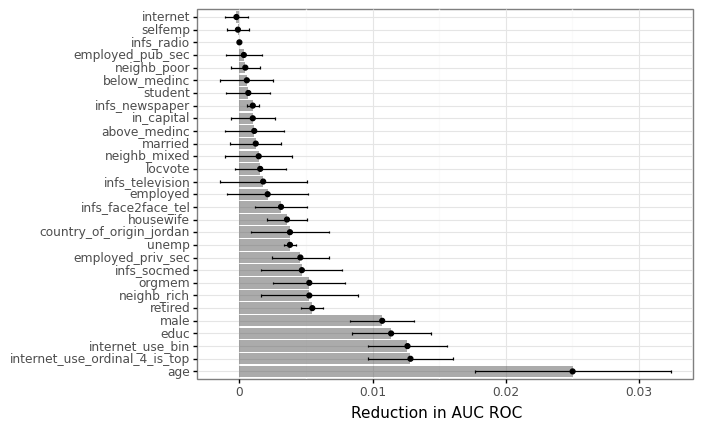

<ggplot: (8790921792684)>

In [254]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

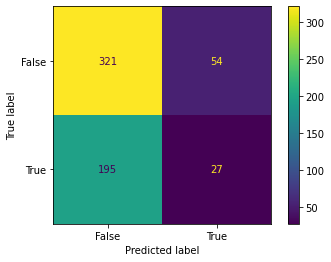

In [255]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(jordan)

In [256]:
score

0.5860997063624547

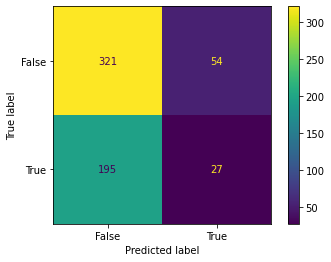

In [257]:
confusion.figure_

In [258]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model', LogisticRegression())])

In [259]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [260]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,educ,0.011502,0.003894,0.003714,0.019290
1,above_medinc,0.010609,0.005459,-0.000310,0.021527
2,retired,0.009045,0.001744,0.005557,0.012534
3,internet,0.008599,0.002633,0.003332,0.013865
4,married,0.005360,0.003471,-0.001581,0.012302
5,housewife,0.004355,0.003923,-0.003490,0.012201
6,neighb_mixed,0.003573,0.004020,-0.004467,0.011614
7,internet_use_bin,0.002457,0.001953,-0.001450,0.006364
8,internet_use_ordinal_4_is_top,0.002457,0.001953,-0.001450,0.006364
9,selfemp,0.002010,0.002165,-0.002321,0.006341


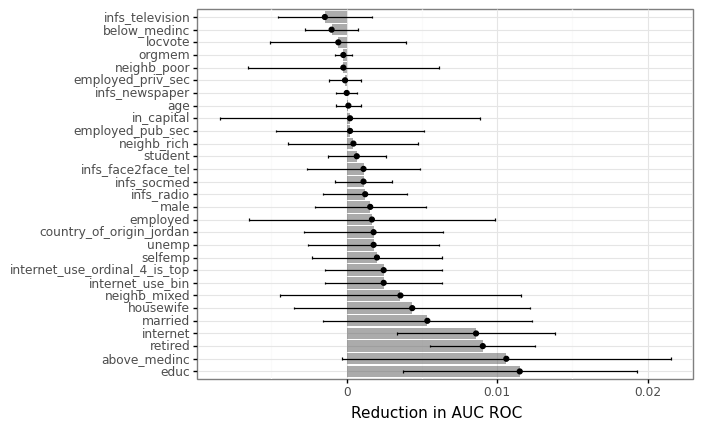

<ggplot: (8790923457530)>

In [261]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [262]:
kuwait.isna().sum()

below_medinc                  0
above_medinc                  0
in_capital                    0
married                       0
employed                      0
employed_pub_sec              0
employed_priv_sec             0
selfemp                       0
retired                       0
housewife                     0
student                       0
unemp                         0
neighb_rich                1374
neighb_poor                1374
neighb_mixed               1374
educ                          0
male                          0
age                           0
orgmem                        0
locvote                       0
internet                      0
internet_use_bin              0
infs_face2face_tel            0
infs_newspaper                0
infs_radio                    0
infs_television               0
infs_socmed                   0
y_2_dem_pref_not_in_dem     278
y_1_trust_gov                 0
dtype: int64

In [263]:
kuwait = kuwait[kuwait['y_2_dem_pref_not_in_dem'].notna()]

In [264]:
kuwait.drop(columns = ["neighb_rich", "neighb_poor", "neighb_mixed"], inplace = True)

In [265]:
kuwait

,below_medinc,above_medinc,in_capital,married,employed,employed_pub_sec,employed_priv_sec,selfemp,retired,housewife,...,locvote,internet,internet_use_bin,infs_face2face_tel,infs_newspaper,infs_radio,infs_television,infs_socmed,y_2_dem_pref_not_in_dem,y_1_trust_gov
0,False,False,False,True,True,True,False,False,False,False,...,False,True,1.0,False,False,False,False,True,False,False
1,False,True,False,True,True,True,False,False,False,False,...,True,True,1.0,False,False,False,False,True,False,True
2,False,False,False,True,False,False,False,False,True,False,...,False,True,0.8,False,False,False,False,True,False,False
3,True,False,False,True,False,False,False,False,True,False,...,True,True,1.0,False,False,False,False,True,False,False
4,True,False,False,True,True,True,False,False,False,False,...,False,True,1.0,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,False,True,False,True,False,False,False,False,False,True,...,False,True,0.8,False,False,False,False,True,False,True
1369,False,True,False,True,False,False,False,False,True,False,...,True,True,0.8,False,False,False,False,True,False,True
1370,False,False,False,False,False,False,False,False,False,False,...,False,True,1.0,False,False,False,False,True,False,True
1372,False,False,False,True,True,True,False,False,False,False,...,True,True,1.0,False,False,False,False,True,False,False


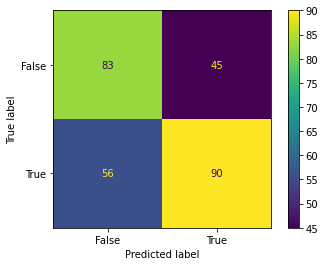

In [269]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(kuwait)

In [270]:
score

0.6592236480567971

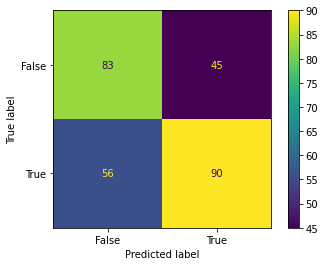

In [271]:
confusion.figure_

In [272]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, max_features=5,
                                        n_estimators=500))])

In [273]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [274]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,age,0.090754,0.010454,0.069847,0.111662
1,infs_socmed,0.075426,0.014939,0.045547,0.105304
2,educ,0.059367,0.006725,0.045917,0.072818
3,above_medinc,0.048662,0.003847,0.040968,0.056356
4,locvote,0.043066,0.005737,0.031591,0.054540
5,in_capital,0.035766,0.005633,0.024500,0.047032
6,internet_use_bin,0.033090,0.005462,0.022165,0.044015
7,male,0.031873,0.003019,0.025835,0.037912
8,below_medinc,0.029927,0.002121,0.025685,0.034169
9,orgmem,0.027494,0.003968,0.019557,0.035430


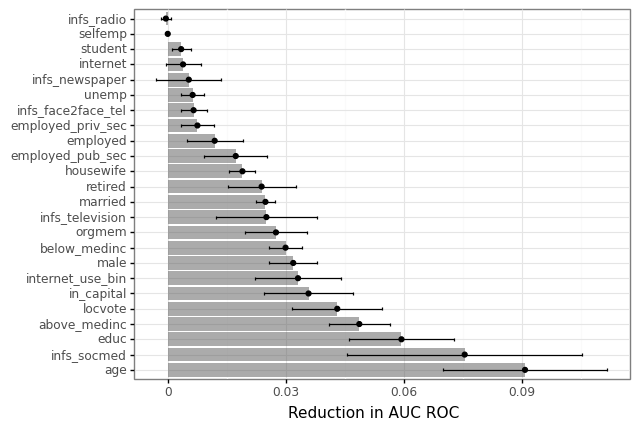

<ggplot: (8790924001274)>

In [275]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

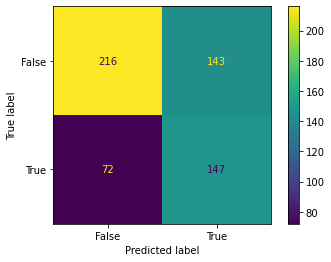

In [276]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(morocco)

In [277]:
score

0.7140173756153516

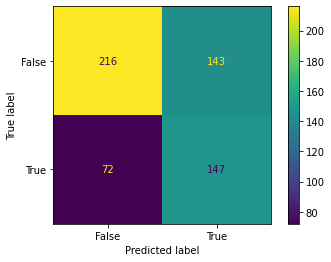

In [278]:
confusion.figure_

In [279]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model', LogisticRegression(class_weight='balanced'))])

In [280]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [281]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,educ,0.048558,0.004590,0.039377,0.057739
1,infs_socmed,0.046136,0.008670,0.028797,0.063476
2,internet,0.010957,0.005697,-0.000437,0.022352
3,selfemp,0.003922,0.003850,-0.003778,0.011621
4,infs_television,0.003345,0.003146,-0.002947,0.009637
5,infs_face2face_tel,0.002768,0.003167,-0.003566,0.009102
6,infs_radio,0.002076,0.003870,-0.005665,0.009817
7,age,0.001845,0.000432,0.000982,0.002709
8,locvote,0.000923,0.003192,-0.005462,0.007307
9,neighb_mixed,-0.000231,0.000283,-0.000796,0.000334


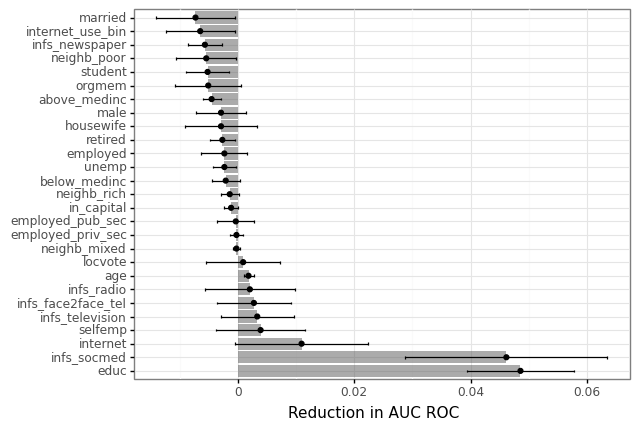

<ggplot: (8790923742449)>

In [282]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

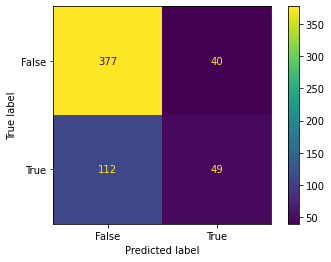

In [283]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(morocco)

In [284]:
score

0.7347449905146631

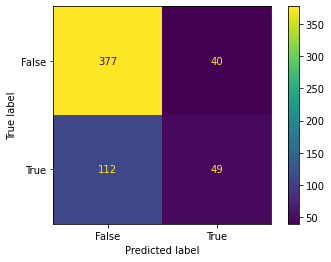

In [285]:
confusion.figure_

In [286]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=5,
                                        n_estimators=1000))])

In [287]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [288]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,age,0.056286,0.004104,0.048078,0.064494
1,locvote,0.043368,0.005176,0.033016,0.053720
2,educ,0.020877,0.003969,0.012939,0.028814
3,infs_television,0.020415,0.001070,0.018276,0.022554
4,employed,0.010727,0.001809,0.007109,0.014345
5,male,0.010381,0.002501,0.005380,0.015382
6,infs_socmed,0.010035,0.003375,0.003285,0.016784
7,infs_face2face_tel,0.006805,0.000848,0.005110,0.008500
8,neighb_poor,0.006805,0.002511,0.001783,0.011827
9,neighb_mixed,0.006690,0.001242,0.004205,0.009174


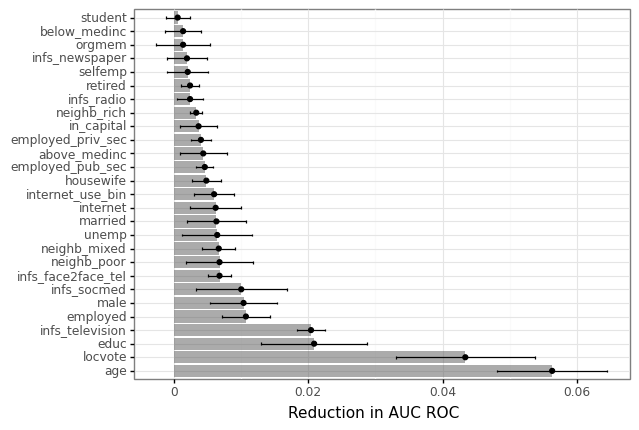

<ggplot: (8790950161713)>

In [289]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [290]:
egypt.drop(columns = "locvote", inplace = True)

In [291]:
egypt.dropna(inplace = True)

In [292]:
egypt.isna().sum()

below_medinc               0
above_medinc               0
in_capital                 0
married                    0
employed                   0
employed_pub_sec           0
employed_priv_sec          0
selfemp                    0
retired                    0
housewife                  0
student                    0
unemp                      0
neighb_rich                0
neighb_poor                0
neighb_mixed               0
educ                       0
male                       0
age                        0
orgmem                     0
internet                   0
internet_use_bin           0
infs_face2face_tel         0
infs_newspaper             0
infs_radio                 0
infs_television            0
infs_socmed                0
y_2_dem_pref_not_in_dem    0
y_1_trust_gov              0
dtype: int64

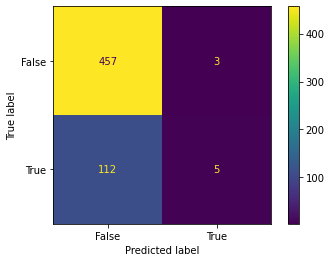

In [293]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(egypt)

In [294]:
score

0.7244421370950991

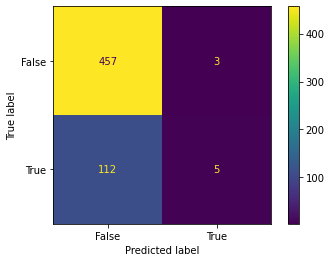

In [295]:
confusion.figure_

In [296]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=7, max_features=5,
                                        n_estimators=1500))])

In [297]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [298]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,educ,0.012254,0.002265,0.007723,0.016785
1,age,0.012139,0.000967,0.010204,0.014073
2,internet_use_bin,0.011098,0.002144,0.006810,0.015387
3,infs_socmed,0.010983,0.002808,0.005366,0.016599
4,infs_television,0.008439,0.002938,0.002563,0.014316
5,orgmem,0.006705,0.001813,0.003079,0.010332
6,internet,0.006705,0.002055,0.002595,0.010815
7,employed,0.006474,0.000674,0.005126,0.007822
8,above_medinc,0.006358,0.000366,0.005627,0.007090
9,employed_priv_sec,0.006358,0.001212,0.003933,0.008783


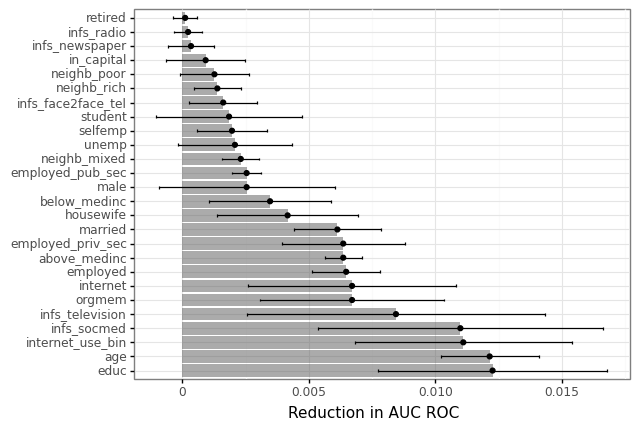

<ggplot: (8790923158574)>

In [299]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

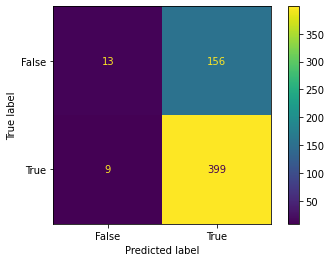

In [300]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = trustgov(egypt)

In [301]:
score

0.6534337408960279

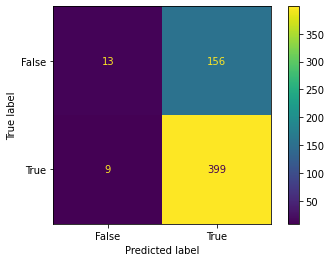

In [302]:
confusion.figure_

In [303]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=7, max_features=5,
                                        n_estimators=500))])

In [304]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [305]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,age,0.024277,0.001097,0.022084,0.026471
1,infs_television,0.019422,0.003574,0.012273,0.026571
2,unemp,0.016185,0.002611,0.010963,0.021407
3,internet_use_bin,0.009711,0.002144,0.005423,0.013999
4,married,0.009017,0.001444,0.006129,0.011905
5,infs_socmed,0.007861,0.001190,0.005481,0.010242
6,orgmem,0.007052,0.001610,0.003832,0.010272
7,internet,0.005896,0.002463,0.000969,0.010822
8,employed_priv_sec,0.005780,0.000633,0.004514,0.007047
9,above_medinc,0.004855,0.001190,0.002475,0.007236


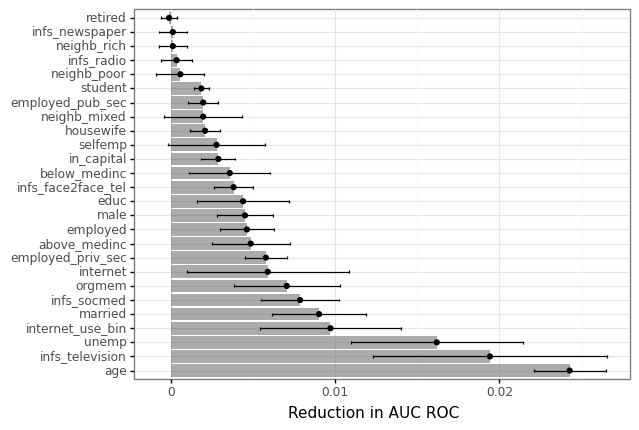

<ggplot: (8790950144064)>

In [306]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [307]:
algeria.dropna(inplace = True)

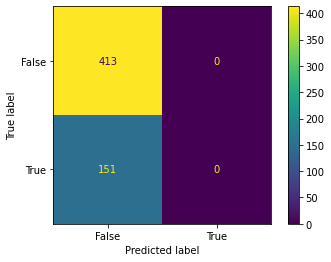

In [308]:
score, best_mod, pred_y, confusion, train_X, test_X, train_y, test_y = dempref(algeria)

In [309]:
score

0.6130748748993327

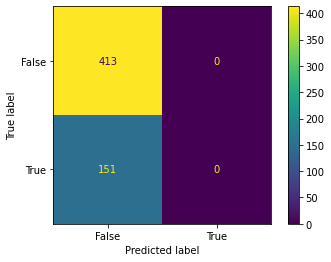

In [310]:
confusion.figure_

In [311]:
best_mod

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, max_features=5,
                                        n_estimators=1000))])

In [312]:
# permutation
vi = permutation_importance(best_mod,train_X,train_y,n_repeats=5)

In [313]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                        vi = vi['importances_mean'],
                        std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,infs_newspaper,0.003548,0.000374,0.002800,0.004296
1,educ,0.002129,0.000473,0.001183,0.003075
2,internet_use_bin,0.002011,0.000473,0.001064,0.002957
3,locvote,0.001892,0.000237,0.001419,0.002365
4,age,0.001774,0.000836,0.000101,0.003447
5,retired,0.001538,0.000290,0.000958,0.002117
6,male,0.001419,0.000473,0.000473,0.002365
7,internet,0.001183,0.000529,0.000125,0.002241
8,employed,0.001064,0.000443,0.000179,0.001950
9,below_medinc,0.000946,0.000473,0.000000,0.001892


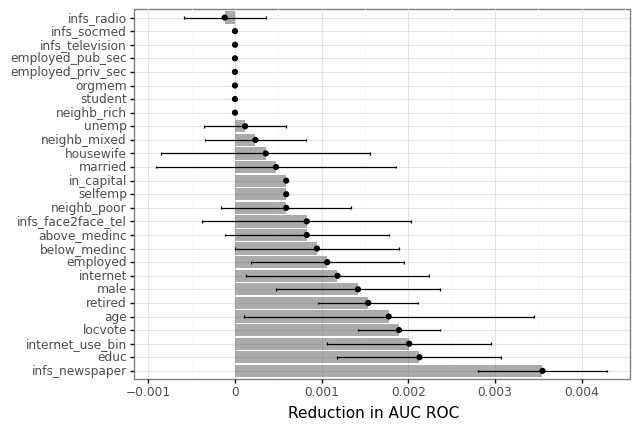

<ggplot: (8790950583860)>

In [314]:
# Plot
(
    ggplot(vi_dat,
        aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

In [325]:
from sklearn.datasets import make_classification

In [327]:
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = Logit(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [328]:
# predict probabilities
yhat = model.predict_proba(testX)
yhat

array([[9.92758703e-01, 7.24129721e-03],
       [9.96495510e-01, 3.50448974e-03],
       [9.99867566e-01, 1.32433775e-04],
       ...,
       [9.98780592e-01, 1.21940764e-03],
       [9.99705540e-01, 2.94459735e-04],
       [9.99603387e-01, 3.96613003e-04]])

In [ ]:
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

In [333]:
# keep probabilities for the positive outcome only
yhat

array([0.0072413 , 0.00350449, 0.00013243, ..., 0.00121941, 0.00029446,
       0.00039661])

In [336]:
# calculate roc curves
fpr, tpr, thresholds = m.roc_curve(testy, yhat)
print(fpr) 
print(tpr) 
print(thresholds)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.02020202e-04,
        2.02020202e-04, 6.06060606e-04, 6.06060606e-04, 1.01010101e-03,
        1.01010101e-03, 1.21212121e-03, 1.21212121e-03, 1.81818182e-03,
        1.81818182e-03, 3.63636364e-03, 3.63636364e-03, 5.65656566e-03,
        5.65656566e-03, 6.66666667e-03, 6.66666667e-03, 8.48484848e-03,
        8.48484848e-03, 1.01010101e-02, 1.01010101e-02, 1.37373737e-02,
        1.37373737e-02, 1.63636364e-02, 1.63636364e-02, 2.38383838e-02,
        2.38383838e-02, 4.28282828e-02, 4.28282828e-02, 4.56565657e-02,
        4.56565657e-02, 5.29292929e-02, 5.29292929e-02, 9.91919192e-02,
        9.91919192e-02, 1.57979798e-01, 1.57979798e-01, 2.35555556e-01,
        2.35555556e-01, 2.65252525e-01, 2.65252525e-01, 1.00000000e+00]),
 array([0.  , 0.02, 0.56, 0.56, 0.58, 0.58, 0.62, 0.62, 0.66, 0.66, 0.68,
        0.68, 0.7 , 0.7 , 0.72, 0.72, 0.74, 0.74, 0.76, 0.76, 0.78, 0.78,
        0.8 , 0.8 , 0.82, 0.82, 0.84, 0.84, 0.86, 0.86, 0.

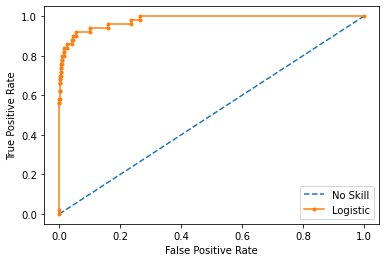

In [338]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

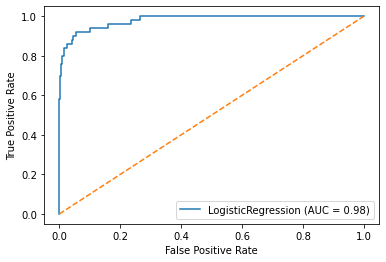

In [341]:
m.plot_roc_curve(model, testX, testy)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')